In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv("datasets/diabetes.csv")
data = data.copy()

In [ ]:
df = pd.DataFrame(data.drop('Pregnancies', axis=1))
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe(include='all')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
def check_df(dataframe: object, head: object = 5) -> object:
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("NANs")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.quantile([0, 0.05,0.1, 0.25, 0.50,0.75, 0.90, 0.95, 0.99, 1]).T)
check_df(df)

Shape
(768, 8)
Types
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
NANs
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Quantiles
                            0.00      0.05    0.10      0.25      0.50  \
Glucose                    0.000  79.00000  85.000  99.00000  117.0000   
BloodPressure              0.000  38.70000  54.000  62.00000   72.0000   
SkinThickness              0.000   0.00000   0.000   0.00000   23.0000   
Insulin                    0.000   0.00000   0.000   0.00000   30.5000   
BMI                        0.000  21.80

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


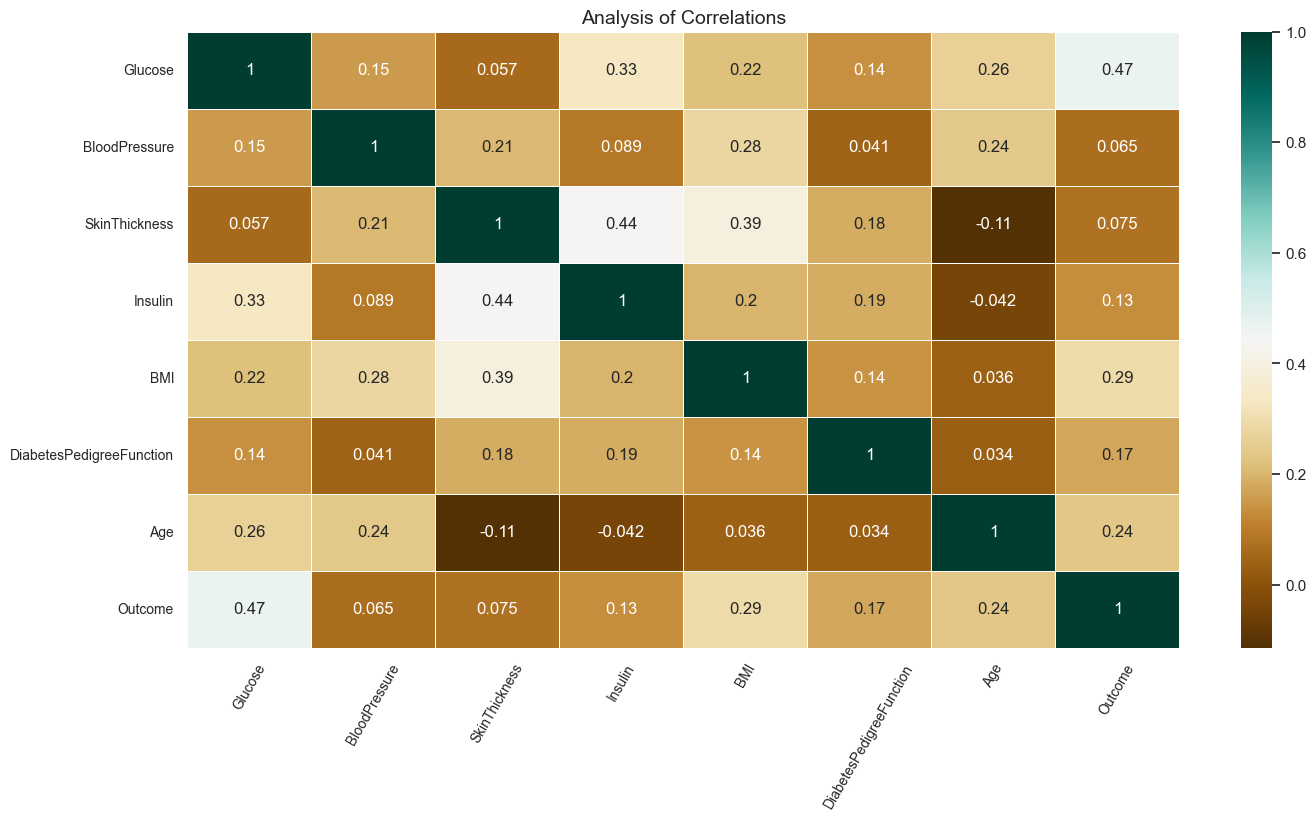

In [ ]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (16, 8)})
        sns.heatmap(corr, cmap="BrBG", annot=True, linewidths=.6)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(df, plot=True)

In [ ]:
df1 = df[df['Glucose']<25] #noises
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [ ]:
df.nsmallest(10, columns='Glucose')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1
62,44,62,0,0,25.0,0.587,36,0
680,56,56,28,45,24.2,0.332,22,0
146,57,80,37,0,32.8,0.096,41,0
537,57,60,0,0,21.7,0.735,67,0
352,61,82,28,0,34.4,0.243,46,0


In [ ]:
df.drop(df.index[[75, 182, 342, 349, 502]], inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


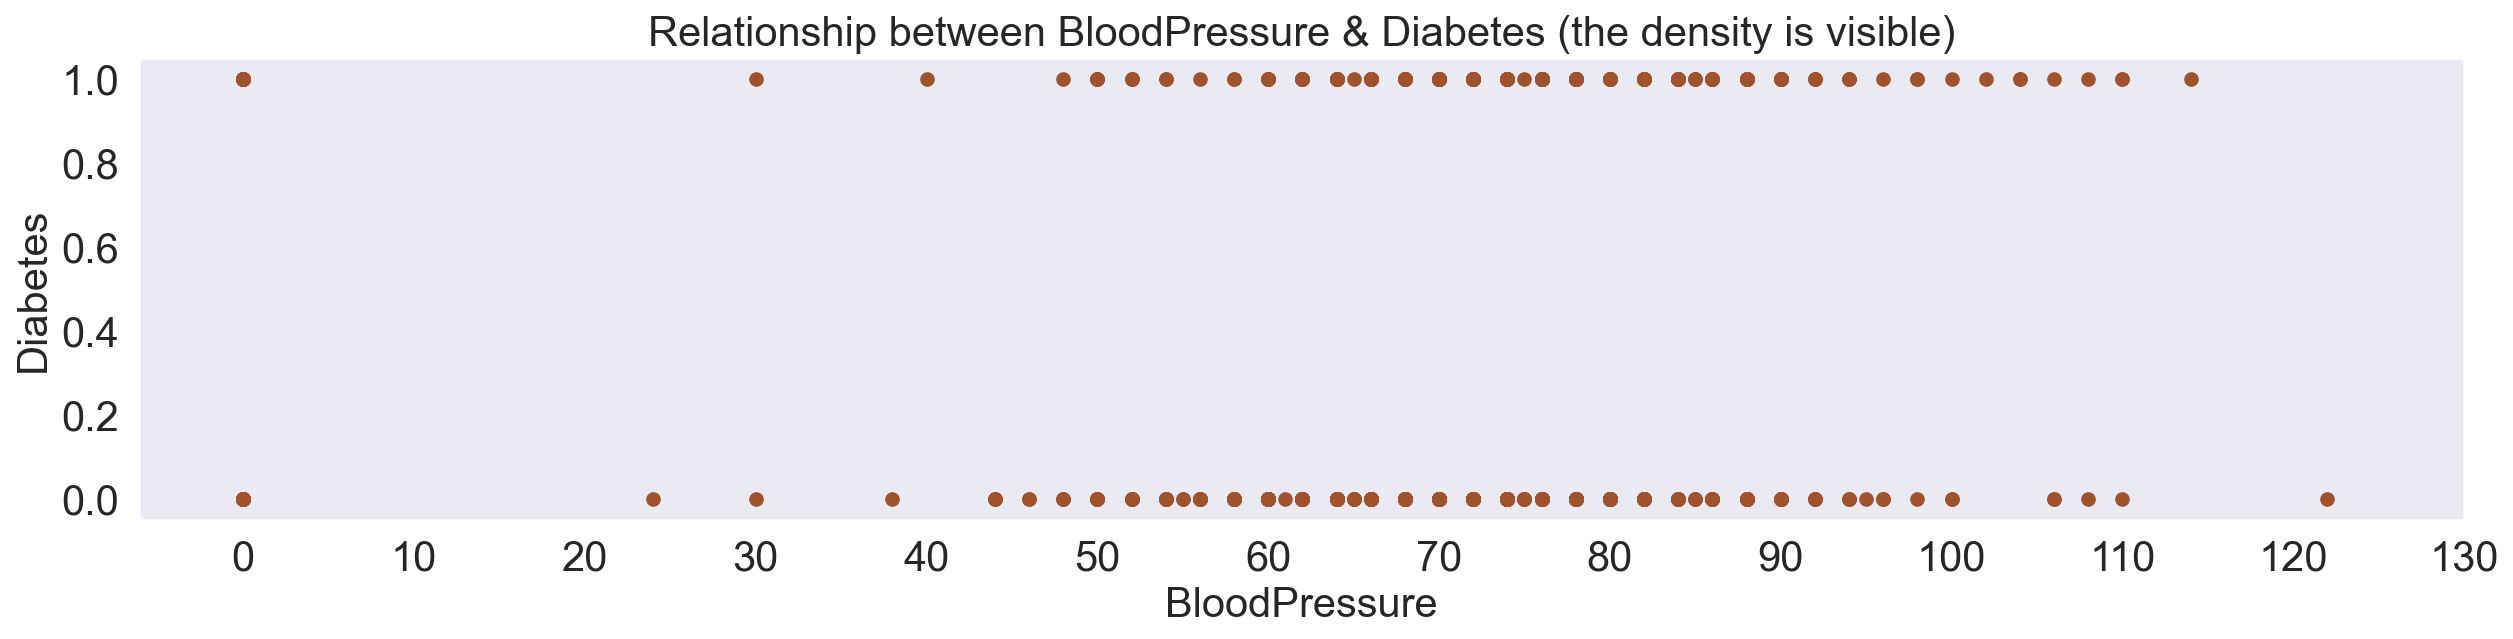

In [ ]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (df["BloodPressure"] , df["Outcome"] , color = "sienna")
plt.title ("Relationship between BloodPressure & Diabetes (the density is visible)", fontsize = 20)
plt.xticks (range (0 , 140 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

In [ ]:
df2= df[df['BloodPressure']<20]
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,115,0,0,0,35.3,0.134,29,0
15,100,0,0,0,30.0,0.484,32,1
49,105,0,0,0,0.0,0.305,24,0
60,84,0,0,0,0.0,0.304,21,0
78,131,0,0,0,43.2,0.270,26,1
81,74,0,0,0,0.0,0.102,22,0
172,87,0,23,0,28.9,0.773,25,0
193,135,0,0,0,52.3,0.578,40,1
222,119,0,0,0,25.2,0.209,37,0
261,141,0,0,0,30.0,0.761,27,1


In [ ]:
print(len(df2))

35


In [ ]:
df.drop(df.nsmallest(35, columns='BloodPressure').index, inplace=True)

In [ ]:
df3 = df[df['SkinThickness']==0]
df3


NameError: name 'df' is not defined